*Luka Alhonen*
# Exercise 5

## 1. Non-programming Tasks

### 1.1 Learning diary

### 1.2 Contextual Security

## 2. Programming Tasks

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [3]:
df = pd.read_csv('task5.csv')


### 2.1 DS4IoT Evaluation

#### a) 

To evaluate the performance of the two clustering algorithms I plotted the clusters (each with a different color) and then the ground truth (aggregate of temperature and pm using mean) of each cluster as a star of the same color as the cluster. 

As one can see from plots 1.1 and 1.2, the only difference between the two algorithms is that clusters 2 and 3 are switched. Because of this, Agglomerative Clustering is more accurate. Looking at plot 1.2, we can see that clusters 0, 2 and 3 are closest to the ground truth.

In [24]:
# Aggregate temp and pm by station id using median
grouped_df = df.groupby('id')[['temperature', 'pm']].median()

In [47]:
X = grouped_df.values

# Kmeans
kmeans = KMeans(n_clusters=6, random_state=1234).fit(X)
grouped_df['kmeans_cluster'] = kmeans.labels_

# Agglomerative
agg_clustering = AgglomerativeClustering(n_clusters=6).fit(X)
grouped_df['agg_cluster'] = agg_clustering.labels_

In [62]:
# Ground truth
gt_df = df.groupby('area')[['temperature', 'pm']].mean()

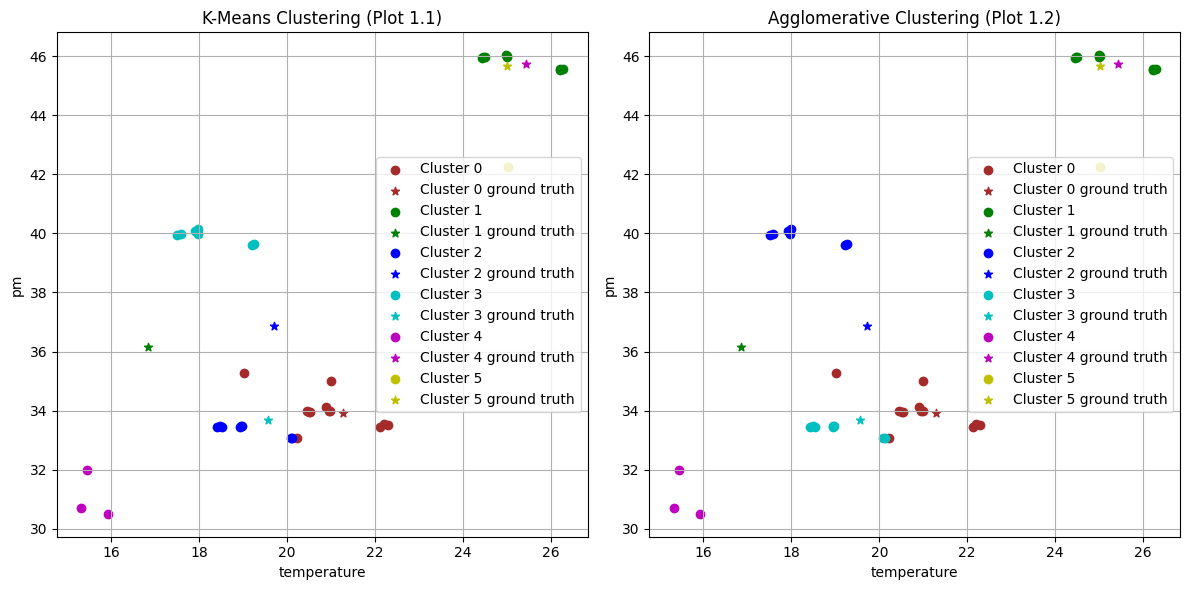

In [67]:
colors = ['brown', 'g', 'b', 'c', 'm', 'y']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot K-Means clusters
for i in range(6):
    cluster = grouped_df[grouped_df['kmeans_cluster'] == i]
    gt = gt_df[gt_df.index == i]
    axs[0].scatter(cluster['temperature'], cluster['pm'], c=colors[i], label=f'Cluster {i}')
    axs[0].scatter(gt['temperature'], gt['pm'], c=colors[i], marker='*', label=f'Cluster {i} ground truth')

axs[0].set_title('K-Means Clustering (Plot 1.1)')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('pm')
axs[0].legend()
axs[0].grid()

# Plot Agglomerative clusters
for i in range(6):
    cluster = grouped_df[grouped_df['agg_cluster'] == i]
    gt = gt_df[gt_df.index == i]
    axs[1].scatter(cluster['temperature'], cluster['pm'], c=colors[i], label=f'Cluster {i}')
    axs[1].scatter(gt['temperature'], gt['pm'], c=colors[i], marker='*', label=f'Cluster {i} ground truth')

axs[1].set_title('Agglomerative Clustering (Plot 1.2)')
axs[1].set_xlabel('temperature')
axs[1].set_ylabel('pm')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

#### b)

